## Importing Necessary modules

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings

from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

In [2]:
income=pd.read_csv(r"K:\Desktop\NIIT\Concept\Course9\DS2_C6_S1_Income_Data_Challenge.csv")

In [3]:
income_copy=income

## EDA

In [4]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [6]:
income.isna().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [7]:
objects=income.select_dtypes(include="object")
encoder=LabelEncoder()
for item in objects:
    income[item]=encoder.fit_transform(income[item])
income

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,1,0,0,20,39,0


In [8]:
x=income.drop("Income_Bracket",axis=1)
y=income.Income_Bracket

In [9]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

### Feature selection

In [10]:
features=income.corr()["Income_Bracket"].sort_values(ascending=False).index[1:6]

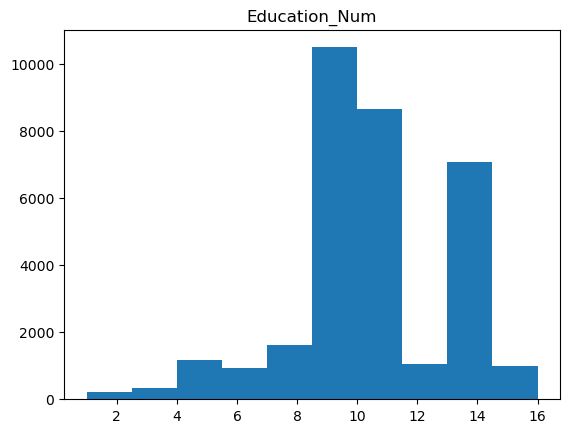

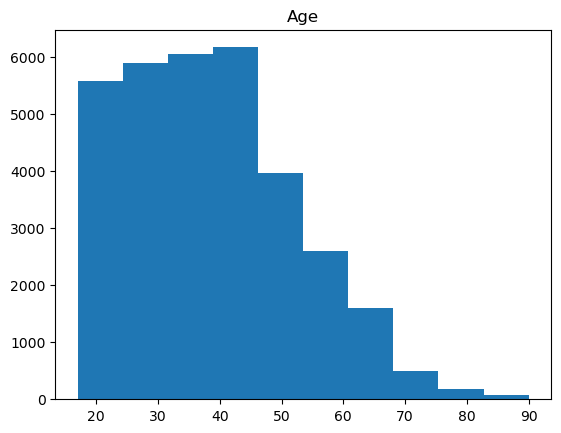

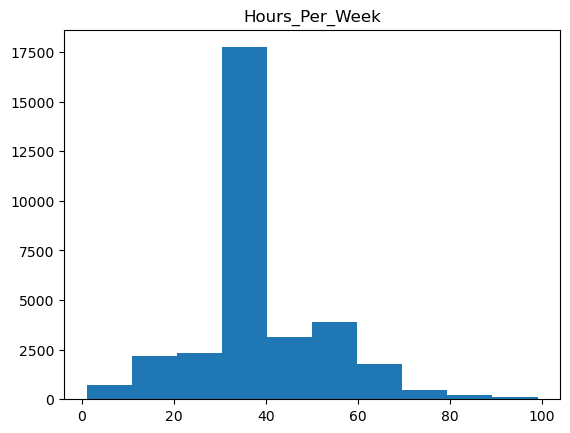

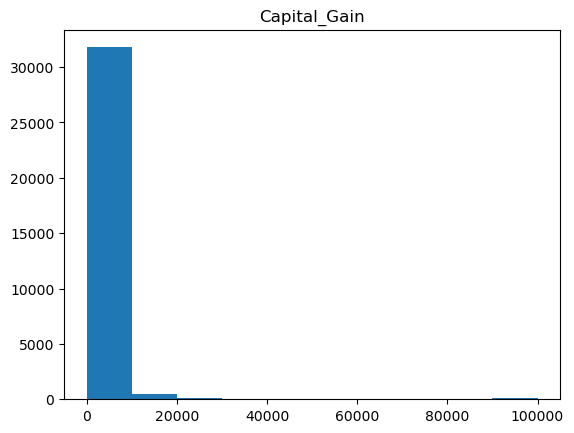

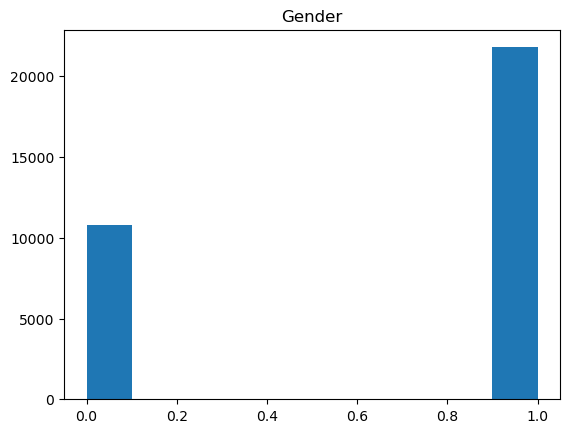

In [11]:
for item in features:
        plt.hist(income[item])
        plt.title(item)
        plt.show()

## Optimum K value for KNN

In [14]:
scores=[]
ks=[i for i in range(2,8)]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
for i in range(2,8):
    knn=KNeighborsClassifier(i)
    knn.fit(xtrain,ytrain)
    scores.append(knn.score(xtrain,ytrain))
    
print("Best K value for model = ",ks[scores.index(np.max(scores))])

Best K value for model =  3


### Model Building

In [25]:
knn=KNeighborsClassifier(3)

knn.fit(xtrain,ytrain)

ypred=knn.predict(xtest)

print("Score of model in test data : ",knn.score(xtest,ytest))

print("Accurary score of model : ",accuracy_score(ypred,ytest))

Score of model in test data :  0.816981421771841
Accurary score of model :  0.816981421771841


## Conclusion :
Based on the information provided, the KNN model you have used has an accuracy score of 0.816981421771841. This score is a measure of how well the model has performed in classifying the test data. An accuracy score of 0.816981421771841 means that the model was able to correctly classify 81.7% of the test data.